In [10]:
# Re-import necessary libraries and re-define all required variables and functions due to code execution state reset.
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Generate a synthetic dataset
n_classes = 2
n_hidden = 10
X, y = make_classification(n_samples=1000, n_features=20, n_classes=n_classes, n_informative=n_classes, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define two neural network architectures
class NN1(nn.Module):
    def __init__(self, input_size):
        super(NN1, self).__init__()
        self.fc1 = nn.Linear(input_size, n_hidden)  # Hidden layer
        self.fc2 = nn.Linear(n_hidden, n_classes)  # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return torch.softmax(x, dim=1)

class NN2(nn.Module):
    def __init__(self, input_size):
        super(NN2, self).__init__()
        self.fc1 = nn.Linear(input_size, n_classes)  # Output layer directly, no hidden layer

    def forward(self, x):
        return torch.softmax(self.fc1(x), dim=1)

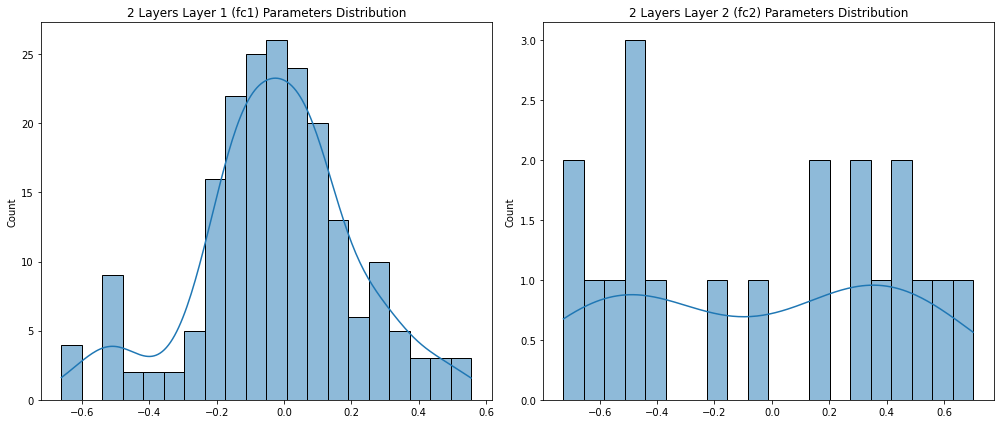

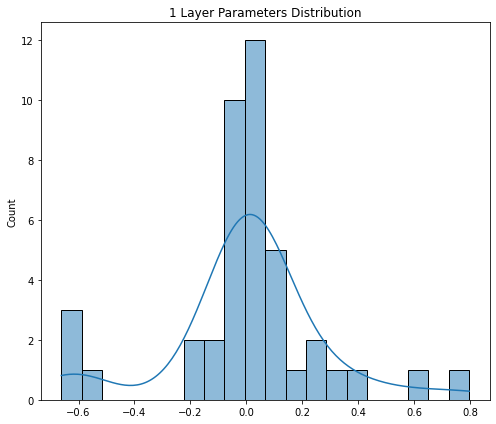

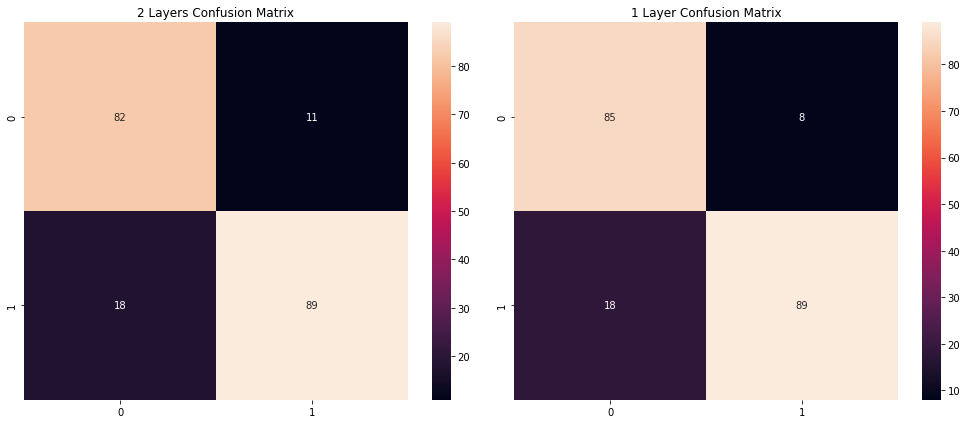

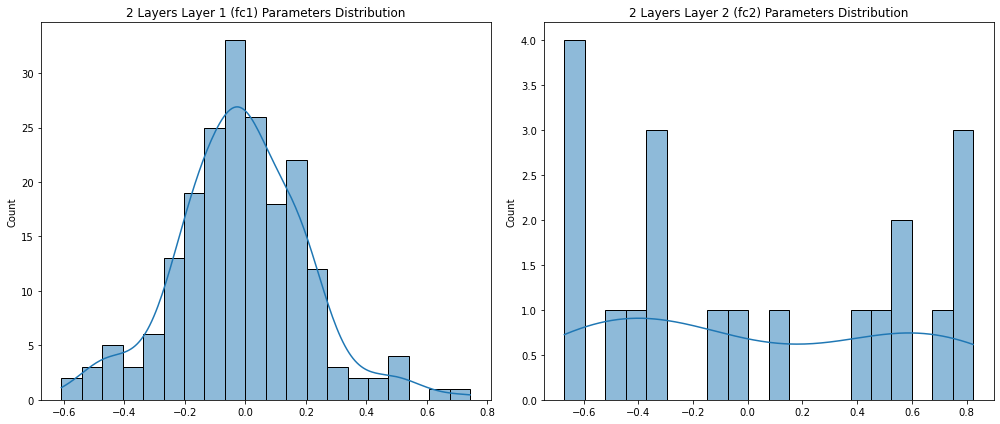

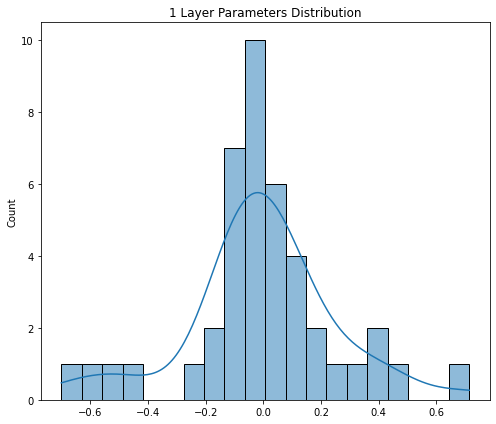

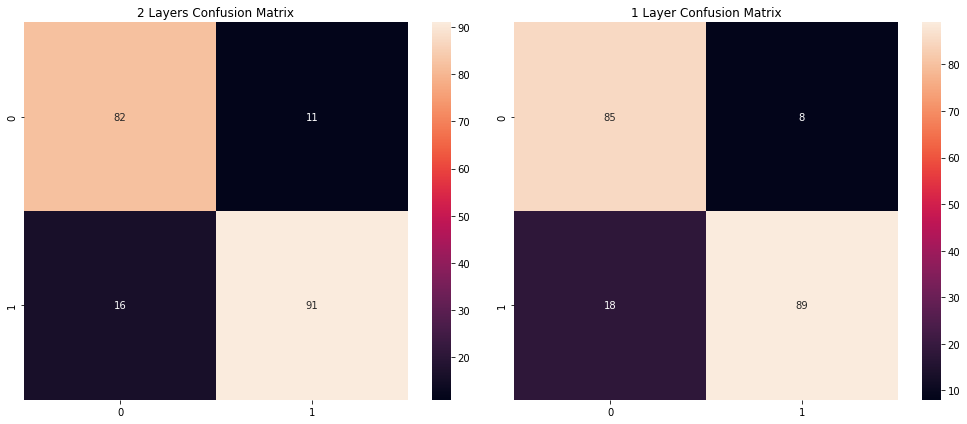

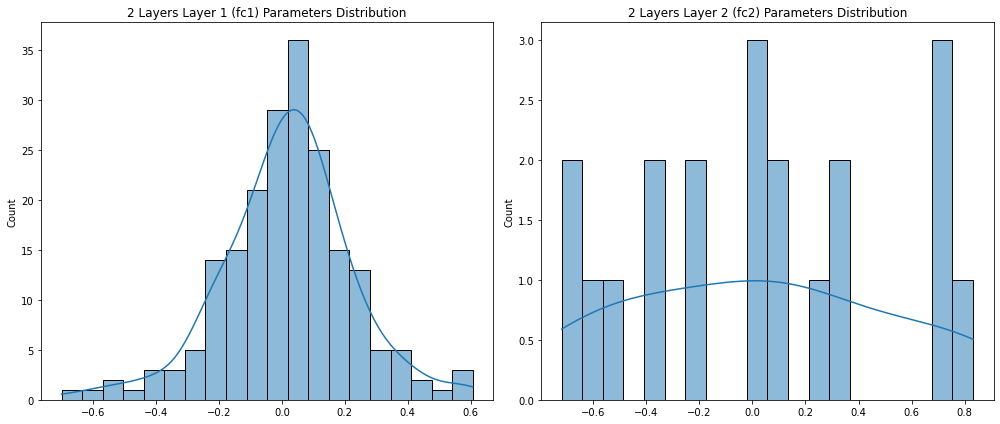

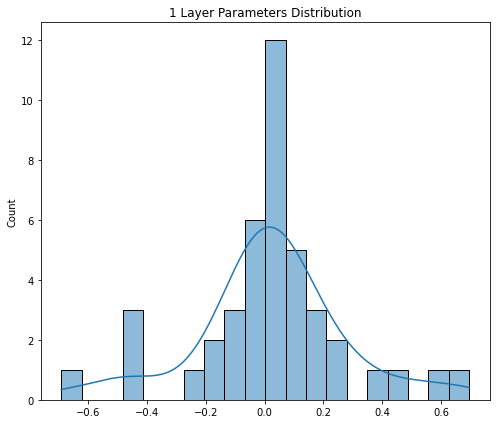

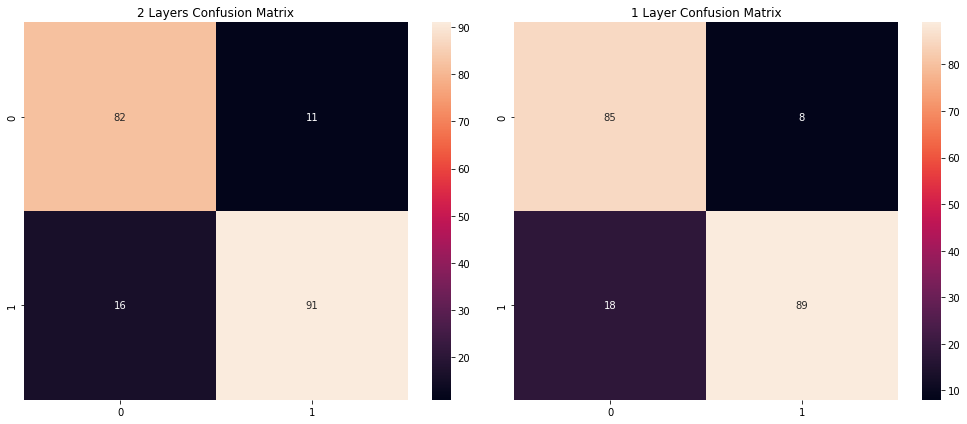

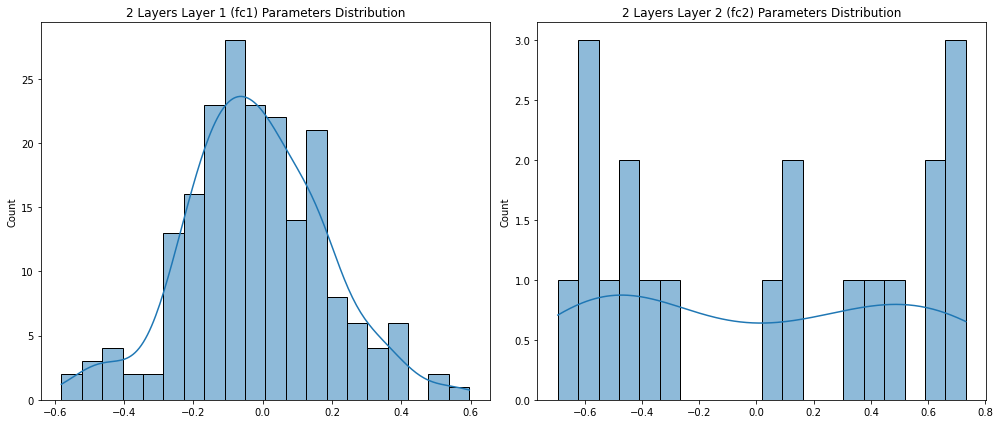

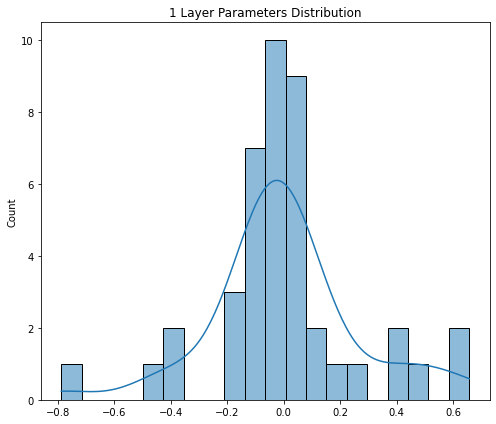

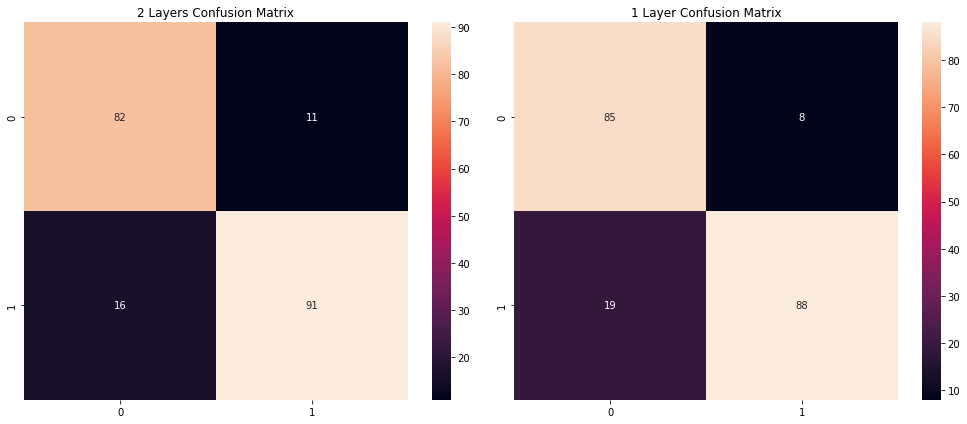

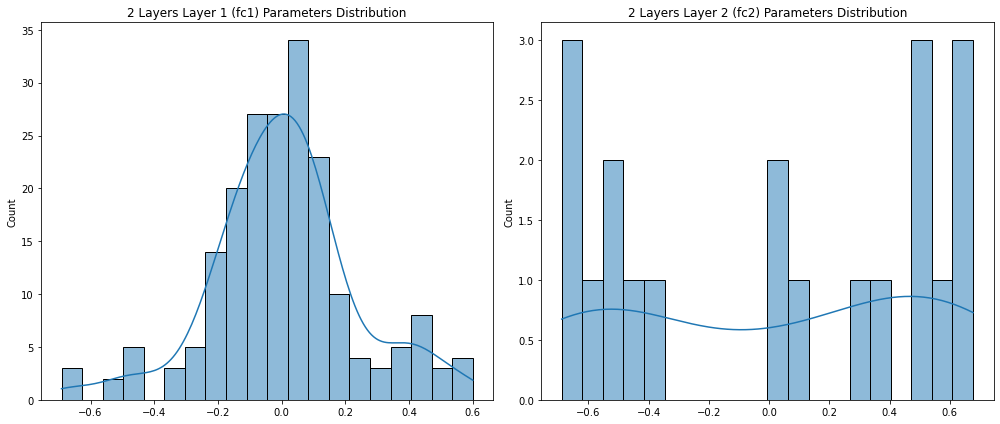

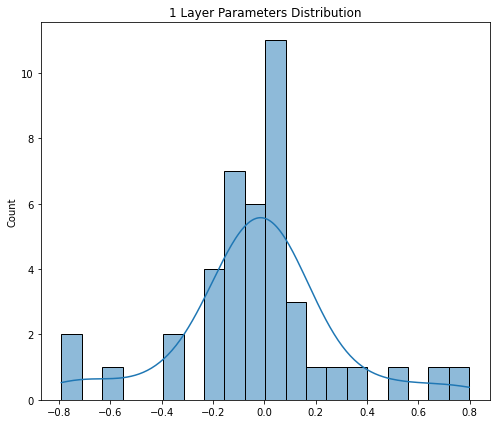

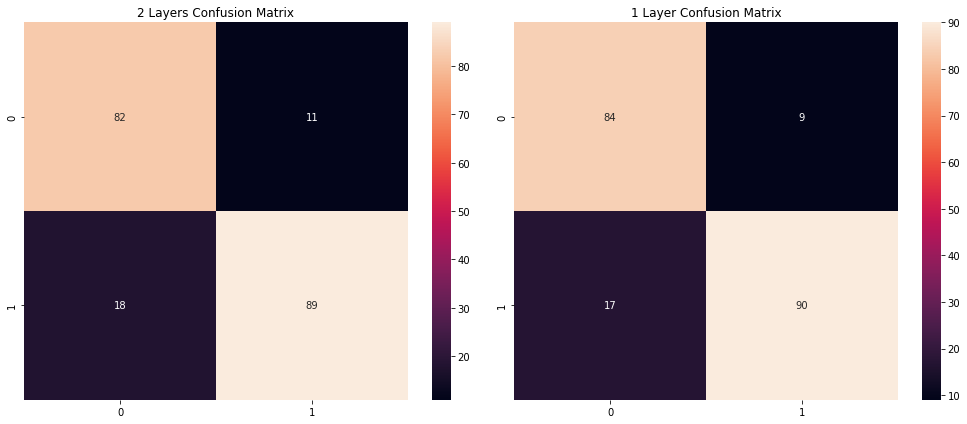

In [26]:
for _ in range(5):
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # Initialize models
    input_size = X_train.shape[1]
    nn1 = NN1(input_size)
    nn2 = NN2(input_size)

    # Hyperparameters
    learning_rate = 0.01
    epochs = 100

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer1 = optim.Adam(nn1.parameters(), lr=learning_rate)
    optimizer2 = optim.Adam(nn2.parameters(), lr=learning_rate)

    # Training loop for NN1
    for epoch in range(epochs):
        optimizer1.zero_grad()
        outputs = nn1(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer1.step()

    # Training loop for NN2
    for epoch in range(epochs):
        optimizer2.zero_grad()
        outputs = nn2(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer2.step()

    # Evaluation function
    def evaluate_model(model, X_test_tensor, y_test):
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs.data, 1)
            y_pred = predicted.numpy()
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
        return accuracy, f1, cm

    accuracy1, f1_score1, cm1 = evaluate_model(nn1, X_test_tensor, y_test)
    accuracy2, f1_score2, cm2 = evaluate_model(nn2, X_test_tensor, y_test)

    # Extract parameters for NN1 layers
    params_nn1_fc1 = nn1.fc1.weight.data.numpy().flatten()
    params_nn1_fc2 = nn1.fc2.weight.data.numpy().flatten()

    def extract_parameters(model):
        params = []
        for param in model.parameters():
            params.append(param.data.numpy().flatten())
        params = np.concatenate(params)
        return params

    # Extract parameters for NN2
    params_nn2 = extract_parameters(nn2)  # Re-using the previously defined function

    # Corrected plot for parameters of NN1 by layer and confusion matrices with correct titles
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(params_nn1_fc1, bins=20, kde=True, ax=ax[0])
    ax[0].set_title('2 Layers Layer 1 (fc1) Parameters Distribution')
    sns.histplot(params_nn1_fc2, bins=20, kde=True, ax=ax[1])
    ax[1].set_title('2 Layers Layer 2 (fc2) Parameters Distribution')
    plt.tight_layout()
    plt.show()

    # Plot for parameters distribution of NN2 with corrected title
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.histplot(params_nn2, bins=20, kde=True)
    ax.set_title('1 Layer Parameters Distribution')
    plt.tight_layout()
    plt.show()

    # Corrected plot for confusion matrices with updated titles
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.heatmap(cm1, annot=True, fmt="d", ax=ax[0])
    ax[0].set_title('2 Layers Confusion Matrix')
    sns.heatmap(cm2, annot=True, fmt="d", ax=ax[1])
    ax[1].set_title('1 Layer Confusion Matrix')
    plt.tight_layout()
    plt.show()
    print(f'=' * 100)
    print(f'\n\n\n\n\n\n\n\n\n\n\n')